In [67]:
import time

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin

In [68]:
dataset = pd.read_csv('spam_tfidf.csv', index_col=[0])
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,targhet
0,0.000000,1.04567,0.570084,0.0,0.309696,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.553776,0.000000,0.00000,1
1,0.309672,0.45748,0.445378,0.0,0.135492,0.427637,0.365548,0.120390,0.000000,1.186630,...,0.000000,0.0,0.0,0.00000,0.069628,0.0,0.264787,0.214164,0.08707,1
2,0.088478,0.00000,0.632436,0.0,1.190396,0.290182,0.330734,0.206383,1.141600,0.315593,...,0.131159,0.0,0.0,0.01762,0.075430,0.0,0.196455,0.218923,0.01814,1
3,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.072265,0.0,0.097516,0.000000,0.00000,1
4,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.071210,0.0,0.096092,0.000000,0.00000,1


In [69]:
from sklearn.model_selection import train_test_split

X = dataset.drop('targhet', axis=1)
y = dataset['targhet']  # colonna che segna se è spam o meno
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

sklearn _BaseEstimator_ and _ClassifierMixin_ classes sono usati per creare un classificatore custom
che può essere utilizzato con la libreria sklearn

In [76]:
class NaiveBayesGaussian(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):

        self.mean = []  # primo media di ogni singola parola # uno per spam un per Ham
        self.var = []

        self.freq = []
        self.classes = np.unique(y)
        for c in self.classes:
            self.freq.append((y == c).sum() / y.shape[0])
            self.mean.append(X[y == c].mean(axis=0))
            self.var.append(X[y == c].var(axis=0))

    def predict(self, X):

        size = X.shape[0]

        y = np.zeros(size, dtype=self.classes.dtype)
        probs = np.zeros(len(self.classes))

        for i in range(size):
            max_prob = 0
            max_c = 0
            for c in range(len(self.classes)):
                probs = float(self.norm(X.values[i], c) * self.freq[c])

                if probs > max_prob:
                    max_prob = probs
                    max_c = c
            y[i] = self.classes[max_c]
        return y

    # return the profuct of the probabilities of each word in the sentence
    def norm(self, new_doc: list, target: int):
        new_doc = np.array(new_doc)
        prob = 1
        for i in range(len(new_doc)):
            prob *= self.norm_single(new_doc[i], self.mean[target][i], self.var[target][i])
        return prob

    def norm_single(self, param, mean, sigma):
        if sigma == 0:
            return 0
        return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * (param - mean) ** 2 / sigma ** 2)

Training time: 0.016723
Prediction time: 1.742827
Missclassified examples: 160
Accuracy: 0.826
[0.86550976 0.87826087 0.89130435 0.86304348 0.86956522 0.82391304
 0.8326087  0.60652174 0.70652174 0.74130435]


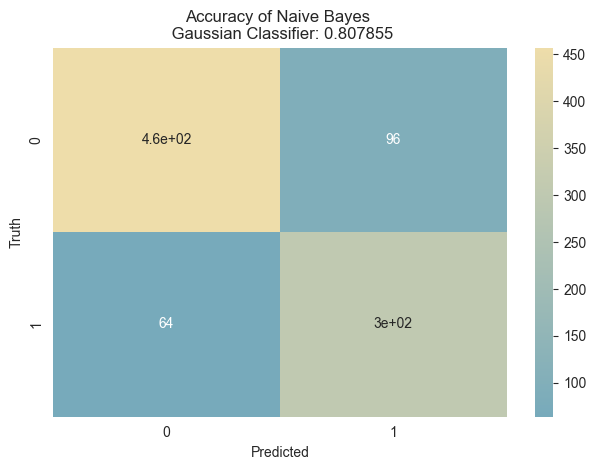

In [78]:
fig = plt.figure()

#for i in range(1):
nbg = NaiveBayesGaussian()
start_time = time.time()
nbg.fit(X_train, y_train)
print('Training time: %f' % (time.time() - start_time))
start_time = time.time()
y_pred_nbg = nbg.predict(X_test)

print('Prediction time: %f' % (time.time() - start_time))
print('Missclassified examples: %d' % (y_test != y_pred_nbg).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_nbg))
score = cross_val_score(nbg, X, y, cv=10, scoring='accuracy')
print(score)
plt.title('Accuracy of Naive Bayes \n Gaussian Classifier: %f' % score.mean())

cm = confusion_matrix(y_test, y_pred_nbg)
sn.heatmap(cm, annot=True, cmap=sn.color_palette("blend:#7AB,#EDA", as_cmap=True))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.tight_layout()



In [75]:
plt.savefig('confusion matrix gaussianoNB.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>